## Assignment 3 - Questions
Use the merged data frame from Assignment 1 (and 2) for this assignment

This Assignment focuses on data preprocessing and model building. Continue with the datasets loaded in Assignment 1 and 2 (or reload with same steps and create merged data frame). In this assignment you need to use both i). Linear SVR regressor and ii) SVR with Linear kernel. Provide your intepretations.

In [1]:
#import required libraries like pandas, numpy, matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random
from numpy import mean
from numpy import std
from scipy import stats
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

In [2]:
#read the train data into dataframe
dengue_train = pd.read_csv("dengue_features_train.csv") 
#view first 3 rows of the dataframe
dengue_train.head(3)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.12260,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.16990,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.03225,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4


In [3]:
#read the dengue_labels_train dataset into another dataframe
dengue_labels = pd.read_csv("dengue_labels_train.csv")  
dengue_labels.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [4]:
#merge the above two dataframes on city, year and weekofyear and store it into new dataframe
merged_train_labels = pd.merge(dengue_train,dengue_labels, on= ["city",'year','weekofyear'])
print(merged_train_labels.shape)

(1456, 25)


In [5]:
merged_train_labels.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In previous assignment, we saw few outliers and I will be removing those and using the data without outliers in my further analysis.

In [6]:
#calculating the z-score of total_cases for city iq
city_iq = merged_train_labels[merged_train_labels["city"] == "iq"]
print(city_iq["total_cases"].count())
print(city_iq["total_cases"].mean())
print(city_iq["total_cases"].std())

520
7.565384615384615
10.765478342208679


In [7]:
z_iq = np.abs(stats.zscore(city_iq["total_cases"])) 
threshold = 3
print(np.where(z_iq > 3))

(array([230, 231, 391, 429, 431, 432, 433], dtype=int64),)


In [8]:
#removing the outliers from city iq
oulier_rem_city_iq = city_iq[(z_iq < 3)]
print(oulier_rem_city_iq.shape)

(513, 25)


In [9]:
#calculating the z-score of total_cases for city sj
city_sj = merged_train_labels[merged_train_labels["city"] == "sj"]
print(city_sj["total_cases"].count())
print(city_sj["total_cases"].mean())
print(city_sj["total_cases"].std())

936
34.18055555555556
51.38137249715158


In [10]:
z_sj = np.abs(stats.zscore(city_sj["total_cases"]))
threshold = 3
print(np.where(z_sj > 3))

(array([227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239,
       240, 428, 429, 430, 431, 432, 433], dtype=int64),)


In [11]:
#removing the outliers from city sj
oulier_rem_city_sj = city_sj[(z_sj < 3)]
print(oulier_rem_city_sj.shape)

(916, 25)


In [12]:
#creating a new dataframe without outliers
df_without_outliers = pd.concat([oulier_rem_city_iq,oulier_rem_city_sj] )
df_without_outliers.shape

(1429, 25)

In [13]:
#create a copy of the original merged dataframe
dengue = df_without_outliers.copy()

1. Write a brief statement: Is it required to consider the repeating features in the model? (For example: precipitation_amt_mm and reanalysis_sat_precip_amt_mm. Similarly there are others). List which features you will choose in this model. Select the required columns in the dataframe and drop the others.

### Previous analysis

I have extracted the month information from week_start_date and created 3 new columns for capturing the seasonal information combining 4 months together i.e **"Jan-Apr", "May- Aug" and "Sep-Dec"**. So I have dropped existing columns *week_start_date* and *weekofyear* because it will be the repetetive information.

I have dropped *year* column in my analysis assuming the year information doesn't impact the number of total_cases of dengue for implementing modeling on this dataset, it can just be useful in analyzing dengue_cases for a particular year.

I also dropped below columns having positive or negative relation below .15 with the target variable total_cases,considering the correlation matrix created in previous analysis and few repetitive columns.

"prec_amt_mm","re_an_dew_point_temp_k","re_an_precip_amt_kg_per_m2","re_an_sat_precip_amt_mm","re_an_specific_hd_g_per_kg","stn_avg_temp_c","stn_max_temp_c","stn_precip_mm".

In [14]:
#dataset from previous assignment
previous_dataset_columns = dengue.drop(["precipitation_amt_mm","reanalysis_sat_precip_amt_mm","reanalysis_dew_point_temp_k"
                                                    ,"reanalysis_specific_humidity_g_per_kg","reanalysis_precip_amt_kg_per_m2","reanalysis_avg_temp_k",
                                                    "station_precip_mm","station_max_temp_c","station_avg_temp_c","year","weekofyear"],axis=1)
previous_dataset_columns.head()

,city,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,reanalysis_air_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_relative_humidity_percent,reanalysis_tdtr_k,station_diur_temp_rng_c,station_min_temp_c,total_cases
936,iq,2000-07-01,0.192886,0.132257,0.340886,0.247200,296.740000,307.3,293.1,92.418571,8.928571,10.775000,20.7,0
937,iq,2000-07-08,0.216833,0.276100,0.289457,0.241657,296.634286,306.6,291.1,93.581429,10.314286,11.566667,20.8,0
938,iq,2000-07-15,0.176757,0.173129,0.204114,0.128014,296.415714,304.5,292.6,95.848571,7.385714,11.466667,20.7,0
939,iq,2000-07-22,0.227729,0.145429,0.254200,0.200314,295.357143,303.6,288.6,87.234286,9.114286,10.533333,14.7,0
940,iq,2000-07-29,0.328643,0.322129,0.254371,0.361043,296.432857,307.0,291.5,88.161429,9.500000,11.480000,19.1,0


### Current Analysis

There are few columns that seems to be repetitive like reanalysis_min_air_temp_k and station_min_temp_c. I would like to check the correlation of these columns to the target variable total_cases and remove the less related one accordingly. 

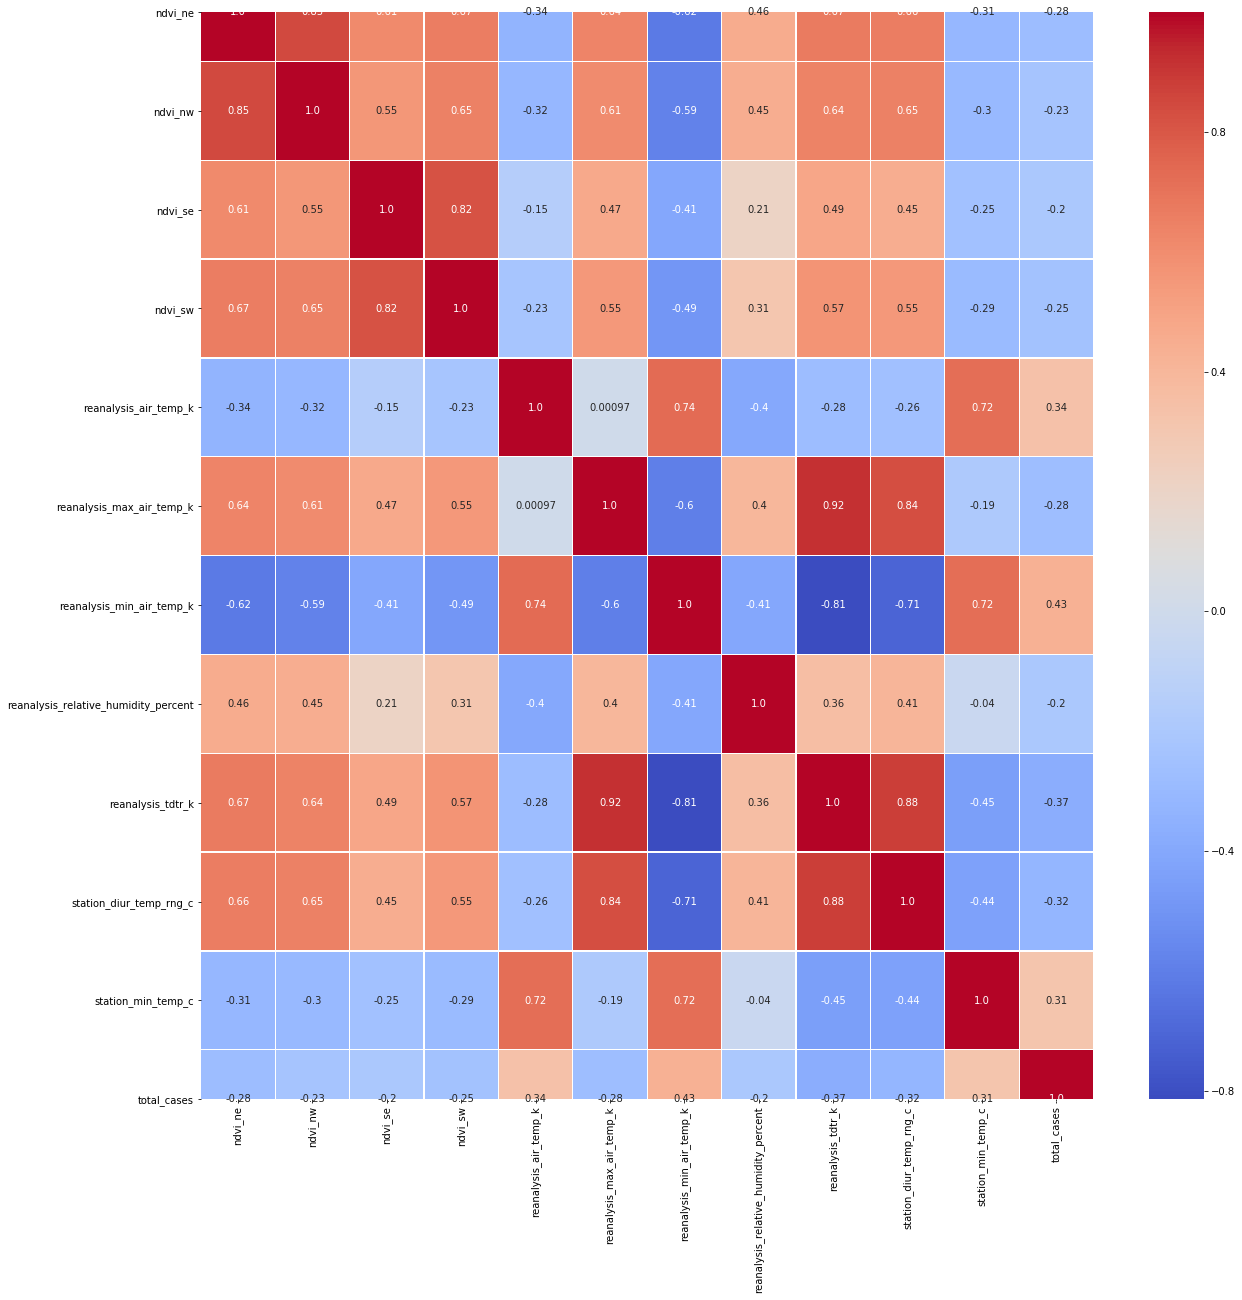

In [15]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(previous_dataset_columns.corr(), cmap="coolwarm",annot=True,fmt = ".2" ,linewidths=.3, ax=ax)

In [16]:
corr = previous_dataset_columns.corr()
corr["total_cases"].sort_values(ascending= False)

total_cases                             1.000000
reanalysis_min_air_temp_k               0.430512
reanalysis_air_temp_k                   0.339467
station_min_temp_c                      0.314665
ndvi_se                                -0.201549
reanalysis_relative_humidity_percent   -0.202465
ndvi_nw                                -0.232438
ndvi_sw                                -0.245064
reanalysis_max_air_temp_k              -0.275001
ndvi_ne                                -0.277485
station_diur_temp_rng_c                -0.324019
reanalysis_tdtr_k                      -0.373125
Name: total_cases, dtype: float64

From above correlation matrix, reanalysis_min_air_temp_k seems to be more related to total_cases than station_min_temp_c, so I will proceed dropping station_min_temp_c from further analysis so as to avoid repetition of same information.

In [17]:
current_dataset = previous_dataset_columns.drop(["station_min_temp_c"],axis=1)

2.Preprocess the data

2.A.Convert percentage to value/100 (check which option gives better result, as-is or divided/100)

In [18]:
#converting the reanalysis_relative_humidity_percent value to decimal
current_dataset["reanalysis_relative_humidity_percent"] = current_dataset["reanalysis_relative_humidity_percent"]/100

In [19]:
current_dataset.head(2)

,city,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,reanalysis_air_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_relative_humidity_percent,reanalysis_tdtr_k,station_diur_temp_rng_c,total_cases
936,iq,2000-07-01,0.192886,0.132257,0.340886,0.247200,296.740000,307.3,293.1,0.924186,8.928571,10.775000,0
937,iq,2000-07-08,0.216833,0.276100,0.289457,0.241657,296.634286,306.6,291.1,0.935814,10.314286,11.566667,0


2.B Scale the vegetation features (ndvi*) as 0, 1 (0 <= 0.25 and 1 > 0.25) as it is in scale of 0 to 0.5. Retain as is or use other scaling based on how model performs.

In [20]:
current_dataset['ndvi_ne'] = np.where(current_dataset["ndvi_ne"] <= 0.25, 0,1) 
current_dataset['ndvi_nw'] = np.where(current_dataset["ndvi_ne"] <= 0.25, 0,1) 
current_dataset['ndvi_se'] = np.where(current_dataset["ndvi_se"] <= 0.25, 0,1) 
current_dataset['ndvi_sw'] = np.where(current_dataset["ndvi_sw"] <= 0.25, 0,1) 
#df['First Season'] = np.where(df['First Season'] > 1990, 1, df['First Season'])

In [21]:
current_dataset.head(2)

,city,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,reanalysis_air_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_relative_humidity_percent,reanalysis_tdtr_k,station_diur_temp_rng_c,total_cases
936,iq,2000-07-01,0,0,1,0,296.740000,307.3,293.1,0.924186,8.928571,10.775000,0
937,iq,2000-07-08,0,0,1,0,296.634286,306.6,291.1,0.935814,10.314286,11.566667,0


2.C Encode the categorical features

In [22]:
#create new columns by extracting the month from week_start_date
current_dataset["month"] = pd.to_datetime(current_dataset["week_start_date"]).dt.month
current_dataset["Jan_Apr"]= np.where(current_dataset["month"].isin([1,2,3,4]),1,0)
current_dataset["May_Aug"]= np.where(current_dataset["month"].isin([5,6,7,8]),1,0)
current_dataset["Sep_Dec"]= np.where(current_dataset["month"].isin([9,10,11,12]),1,0)
current_dataset = current_dataset.drop(["month","week_start_date"],axis =1)

In [23]:
current_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1429 entries, 936 to 935
Data columns (total 15 columns):
city                                    1429 non-null object
ndvi_ne                                 1429 non-null int32
ndvi_nw                                 1429 non-null int32
ndvi_se                                 1429 non-null int32
ndvi_sw                                 1429 non-null int32
reanalysis_air_temp_k                   1419 non-null float64
reanalysis_max_air_temp_k               1419 non-null float64
reanalysis_min_air_temp_k               1419 non-null float64
reanalysis_relative_humidity_percent    1419 non-null float64
reanalysis_tdtr_k                       1419 non-null float64
station_diur_temp_rng_c                 1388 non-null float64
total_cases                             1429 non-null int64
Jan_Apr                                 1429 non-null int32
May_Aug                                 1429 non-null int32
Sep_Dec                                

In [24]:
#Label-Encoding on city attribute
le = LabelEncoder() 
current_dataset['city']= le.fit_transform(current_dataset['city']) 

In [25]:
current_dataset.city = current_dataset["city"].astype("category")
current_dataset.Jan_Apr = current_dataset["Jan_Apr"].astype("category")
current_dataset.May_Aug = current_dataset["May_Aug"].astype("category")
current_dataset.Sep_Dec = current_dataset["Sep_Dec"].astype("category")
current_dataset.ndvi_ne = current_dataset["ndvi_ne"].astype("category")
current_dataset.ndvi_nw = current_dataset["ndvi_nw"].astype("category")
current_dataset.ndvi_se = current_dataset["ndvi_se"].astype("category")
current_dataset.ndvi_sw = current_dataset["ndvi_sw"].astype("category")
current_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1429 entries, 936 to 935
Data columns (total 15 columns):
city                                    1429 non-null category
ndvi_ne                                 1429 non-null category
ndvi_nw                                 1429 non-null category
ndvi_se                                 1429 non-null category
ndvi_sw                                 1429 non-null category
reanalysis_air_temp_k                   1419 non-null float64
reanalysis_max_air_temp_k               1419 non-null float64
reanalysis_min_air_temp_k               1419 non-null float64
reanalysis_relative_humidity_percent    1419 non-null float64
reanalysis_tdtr_k                       1419 non-null float64
station_diur_temp_rng_c                 1388 non-null float64
total_cases                             1429 non-null int64
Jan_Apr                                 1429 non-null category
May_Aug                                 1429 non-null category
Sep_Dec            

2.D Abbreviate the column names

In [26]:
#changing the column names
current_dataset.columns = current_dataset.columns.str.replace("station","stn")
current_dataset.columns = current_dataset.columns.str.replace("reanalysis","re_an")
current_dataset.columns = current_dataset.columns.str.replace("humidity","hd")
current_dataset.columns = current_dataset.columns.str.replace("precipitation","prec")

2.E Standardize the numerical features

In [27]:
#create a dataframe for numerical attribute
dengue_num = current_dataset.drop(["city","Jan_Apr","May_Aug","Sep_Dec","ndvi_ne","ndvi_nw","ndvi_se","ndvi_sw","total_cases"], axis =1)

In [28]:
# Standardize the numerical attributes
sd = StandardScaler()
std_dataset = pd.DataFrame(sd.fit_transform(dengue_num))
std_dataset

,0,1,2,3,4,5
0,-1.429226,1.195519,-1.012560,1.432092,1.129120,1.265491
1,-1.506709,0.979471,-1.791536,1.594100,1.519524,1.636138
2,-1.666911,0.331326,-1.207304,1.909956,0.694444,1.589319
3,-2.442789,0.053550,-2.765257,0.709823,1.181442,1.152347
4,-1.654346,1.102927,-1.635741,0.838992,1.290111,1.595562
...,...,...,...,...,...,...
1424,-1.269025,-1.150148,-0.506225,-1.099531,-0.573363,-1.070416
1425,-0.446029,-1.119284,0.311700,-1.050372,-0.621660,-0.588854
1426,-0.901504,-1.242740,0.039059,-0.990862,-0.770577,-1.103858
1427,-0.776903,-1.150148,0.078007,-1.372795,-0.601536,-0.856388


In [29]:
# assigning the columnn names
std_dataset.columns = dengue_num.columns
std_dataset.head(2)

,re_an_air_temp_k,re_an_max_air_temp_k,re_an_min_air_temp_k,re_an_relative_hd_percent,re_an_tdtr_k,stn_diur_temp_rng_c
0,-1.429226,1.195519,-1.012560,1.432092,1.129120,1.265491
1,-1.506709,0.979471,-1.791536,1.594100,1.519524,1.636138


2.F Handle NaNs (either fill them with Median values or make a better choice if available)

In [30]:
std_dataset.isnull().sum()

re_an_air_temp_k             10
re_an_max_air_temp_k         10
re_an_min_air_temp_k         10
re_an_relative_hd_percent    10
re_an_tdtr_k                 10
stn_diur_temp_rng_c          41
dtype: int64

I have tried handling the missing values using mean, median and imputation using KNN, the best MAE I achieved is using mean.

In [31]:
# from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=2)
# std_dataset = imputer.fit_transform(std_dataset)
# # std_dataset = std_dataset.fillna(imputer)
# std_dataset
#std_dataset = std_dataset.fillna(std_dataset.median())
# std_dataset = pd.DataFrame(std_dataset)
# type(std_dataset)
# std_dataset.head()
# std_dataset.columns = dengue_num.columns


In [32]:
std_dataset = std_dataset.fillna(std_dataset.mean())

In [33]:
std_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 6 columns):
re_an_air_temp_k             1429 non-null float64
re_an_max_air_temp_k         1429 non-null float64
re_an_min_air_temp_k         1429 non-null float64
re_an_relative_hd_percent    1429 non-null float64
re_an_tdtr_k                 1429 non-null float64
stn_diur_temp_rng_c          1429 non-null float64
dtypes: float64(6)
memory usage: 67.1 KB


In [34]:
std_dataset.ndvi_nw = std_dataset["re_an_air_temp_k"].astype("float64")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [35]:
# extract categorical and target columns
cat_dataset= current_dataset[['city','Jan_Apr','May_Aug','Sep_Dec','ndvi_sw','ndvi_se','ndvi_nw','ndvi_ne','total_cases']]
#setting the same index for numeraical and categorical dataframe 
cat_dataset.index = std_dataset.index

In [36]:
#concat the numerical, categorical and target attributes after transformations
final_df = pd.concat([std_dataset,cat_dataset],axis=1)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 15 columns):
re_an_air_temp_k             1429 non-null float64
re_an_max_air_temp_k         1429 non-null float64
re_an_min_air_temp_k         1429 non-null float64
re_an_relative_hd_percent    1429 non-null float64
re_an_tdtr_k                 1429 non-null float64
stn_diur_temp_rng_c          1429 non-null float64
city                         1429 non-null category
Jan_Apr                      1429 non-null category
May_Aug                      1429 non-null category
Sep_Dec                      1429 non-null category
ndvi_sw                      1429 non-null category
ndvi_se                      1429 non-null category
ndvi_nw                      1429 non-null category
ndvi_ne                      1429 non-null category
total_cases                  1429 non-null int64
dtypes: category(8), float64(6), int64(1)
memory usage: 90.2 KB


In [37]:
final_df.head()

,re_an_air_temp_k,re_an_max_air_temp_k,re_an_min_air_temp_k,re_an_relative_hd_percent,re_an_tdtr_k,stn_diur_temp_rng_c,city,Jan_Apr,May_Aug,Sep_Dec,ndvi_sw,ndvi_se,ndvi_nw,ndvi_ne,total_cases
0,-1.429226,1.195519,-1.012560,1.432092,1.129120,1.265491,0,0,1,0,0,1,0,0,0
1,-1.506709,0.979471,-1.791536,1.594100,1.519524,1.636138,0,0,1,0,0,1,0,0,0
2,-1.666911,0.331326,-1.207304,1.909956,0.694444,1.589319,0,0,1,0,0,0,0,0,0
3,-2.442789,0.053550,-2.765257,0.709823,1.181442,1.152347,0,0,1,0,0,1,0,0,0
4,-1.654346,1.102927,-1.635741,0.838992,1.290111,1.595562,0,0,1,0,1,1,1,1,0


In [38]:
final_df.shape

(1429, 15)

2.G Make an 80-20 train-test split

In [39]:
#performing stratified split on city to maintain the ratio of records for city sj and iq in train and test dataset
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index, test_index in split.split(final_df,final_df["city"]):
    strat_train_set = final_df.loc[train_index]
    strat_test_set = final_df.loc[test_index]

In [40]:
#verifying the ratio 
print(strat_train_set["city"].value_counts()/len(strat_train_set)) 
print(strat_test_set["city"].value_counts()/len(strat_test_set)) 

1    0.641295
0    0.358705
Name: city, dtype: float64
1    0.63986
0    0.36014
Name: city, dtype: float64


In [41]:
# drop the target coulmn and create a target variable dataframe separately
train = strat_train_set.drop("total_cases", axis = 1)
train_target = strat_train_set["total_cases"].copy()
test = strat_test_set.drop("total_cases", axis = 1)
test_target = strat_test_set["total_cases"].copy()
print("train :",train.shape)
print("train_target :",train_target.shape)
print("test :",test.shape)
print("test_target :",test_target.shape)

train : (1143, 14)
train_target : (1143,)
test : (286, 14)
test_target : (286,)


3. Build a Linear SVR regressor, train the model

A. Evaluate your model based on applicable metrics. Show the metric(s) you chose and why you chose this(these) metrics.

In [42]:
svr_linearreg = LinearSVR()
svr_linearreg.fit(train,train_target)

LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [43]:
# predictions on target data
dengue_predictions_svr =  svr_linearreg.predict(test)

In [44]:
#calculating the mean absolute error
svr_mae = mean_absolute_error(test_target,dengue_predictions_svr)
print("mean absolute error:",svr_mae)
#svr_mse = mean_squared_error(test_target,dengue_predictions_svr)
#svr_rmse = np.sqrt(svr_mse)
#r2score = r2_score(test_target,dengue_predictions_svr)

mean absolute error: 14.846116207427633



I have considered Mean Absolute Error as the evaluation metrics for the model LInearSVR used above.It is because it will consider the equal weight of all individual difference between prectiction and actual observation of total cases.And since our target attribute,total_cases is a continuous variable for the prediction of which we will be calculating the accuracy using the regression model. This helps in quantifying our results properly. 

3.B List the hyper-parameters that can be tuned in Linear SVR. Explain the meaning of each hyper-parameter. Show the code along with comments on the parameter value chosen (use class presentation, discussion notes, some online reading) and why this value was chosen. Show the improvement you achieved in model accuracy.

*The hyper-parameters that can be tuned in Linear SVR are:-*
    
epsilon - The value of epsilon defines the margin of tolerance where no penalty is given to the errors.It controls the width of the street and denotes how much error we allow per training data instance.

C - C parameter is used to find a good balance between keeping the street as large as possible and limiting the margin violations.C  defines the weight of how much samples inside the margin contribute to the overall error.The bigger this parameter, the less regularization is used.

tol-It is a stopping criteria, the model stop searching for a minimum once some tolerance is achieved, i.e. once you're close enough.

loss- The loss is measured based on the distance between observed value y and the ε boundary.

max_iter- The maximum number of iterations to be run.

fit_intercept- If set to true,it will calculate the intercept for this model.

intercept_scaling - When self.fit_intercept is True, instance vector x becomes [x, self.intercept_scaling],i.e. a "synthetic" feature with constant value equals to intercept_scaling is appended to the instance vector.

verbose - Enable verbose output. 

random_state - The seed of the pseudo random number generator to use when shuffling the data.

dual -  Prefer dual=False when n_samples > n_features.

To perform tuning of hyperparameters, I have used grid search to find the best estimators using multiple set of values.

In [45]:
# param_grid_LinearSVR = [
#         {"epsilon" :[0.8,1,1.5,1.6], 
#          "C" : [5,5.2,10,100],
# #          "tol" :[0.1,0.15],
#          "loss" : ['squared_epsilon_insensitive','epsilon_insensitive'],
         
#         }]
# # 
# #"max_iter" :[10,50,100]
# grid1 = GridSearchCV(svr_linearreg, param_grid_LinearSVR,scoring = "neg_mean_absolute_error",
#                     return_train_score= True)
# grid1.fit(train,train_target)        


In [46]:
# # summarize the results of the grid search
# print(grid1.best_score_)
# print(grid1.best_params_)

In [47]:
svr_linearreg = LinearSVR(C =5.2, epsilon = 0.8, loss = 'epsilon_insensitive')
svr_linearreg.fit(train,train_target)

LinearSVR(C=5.2, dual=True, epsilon=0.8, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [48]:
# predictions on target data
dengue_predictions_svr =  svr_linearreg.predict(test)
svr_mae = mean_absolute_error(test_target,dengue_predictions_svr)
print("mean absolute error:",svr_mae)

mean absolute error: 14.796736480435259


**There is a slight improvment achieved in the model by using the hyperparameters.The MAE has decreased**

3.C Plot Learning curve and provide insights


In [49]:
train_set_size, train_error,cv_error= learning_curve(svr_linearreg,train,train_target,cv=2,
                                            train_sizes= np.linspace(0.01, 1.0, 50),
                                            scoring = "neg_mean_absolute_error")

In [50]:
train_errs_mean = -train_error.mean(axis = 1)
cv_errs_mean = -cv_error.mean(axis = 1)

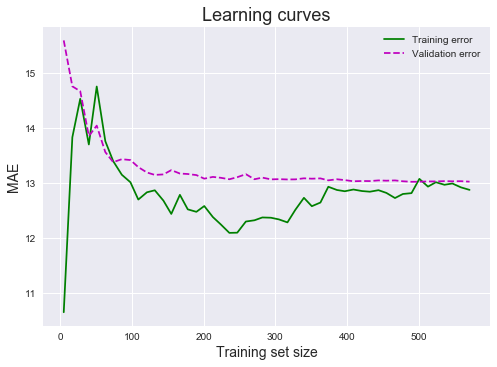

In [51]:
plt.style.use('seaborn')
plt.plot(train_set_size,train_errs_mean,"g-", label = 'Training error')
plt.plot(train_set_size, cv_errs_mean,"--m", label = 'Validation error')
plt.ylabel('MAE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18)
plt.legend()
plt.show()

The Learning curve above shows that :

    * The MAE for the training data is less initially and it increases when the the data points increase but when data points increases more than 50 the MAE tend to decrease and then there are fluctuations.
    * The MAE for the validation data is more initially but starts decreasing as the train size increase and then becomes stable, with no major changes on increasing the train set size.
The gap between training and validation loss learning curve is a "generalization gap" which seems to be less,when the train size increases but since there are continuous change in MAE on increasing the train set size. This model might not generalize well.

4. Build a SVR model with Linear Kernel, train the model

A. Evaluate your model based on applicable metrics. Show the metric(s) you chose and why you chose this(these) metrics.

In [52]:
svm_kernel_reg = SVR(kernel="linear")
svm_kernel_reg.fit(train,train_target)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [53]:
# predictions on target data
dengue_predictions_svm_kernel =  svm_kernel_reg.predict(test)
#calculate the mean absolute error
svm_kernel_mae = mean_absolute_error(test_target,dengue_predictions_svm_kernel)
print("mean absolute error:",svm_kernel_mae)

mean absolute error: 14.876340828400156


The mean absolute error is used as a evaluation metrics for this model as the target is a continuous variable and mae is steady,measures the average magnitude of the errors in a set of predictions, without considering their direction. 

4. B. List the hyper-parameters that can be tuned in SVR model with Linear Kernel. Show the code along with comments on the parameter value chosen (use class presentation, discussion notes, some online reading) and why this value was chosen. Show the improvement you achieved in model accuracy.

In [54]:
# param_grid_LinearkernelSVR = [
#         { 
#          "C" : [1,10,95.2,95.25,95.3],
#          "epsilon" :[0.9,1,1.2,1.5],
# #          "gamma": [0.1,0.15,0.11,],
#          "tol" :[0.1,0.12,0.15,0.2],
            
#         }]
 
# #"tol" :[0.001,0.01,0.1],
# #"max_iter" : [10,50,100],
#  #   "coef0": [0.1,0.5,1,1.5]
# grid2 = GridSearchCV(svm_kernel_reg, param_grid_LinearkernelSVR,scoring = "neg_mean_absolute_error",
#                     return_train_score= True)
# grid2.fit(train,train_target)

In [55]:
# print(grid2.best_score_)
# print(grid2.best_params_)

In [56]:
svr_kernel_reg = SVR(kernel="linear",C= 95.2,gamma='auto', epsilon= 1.5,tol=0.2)
svr_kernel_reg.fit(train,train_target)

SVR(C=95.2, cache_size=200, coef0=0.0, degree=3, epsilon=1.5, gamma='auto',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.2, verbose=False)

In [57]:
# predictions on test data
dengue_predictions_svr_kernel =  svr_kernel_reg.predict(test)
#calculating the mean absolute error
svr_kernel_mae = mean_absolute_error(test_target,dengue_predictions_svr_kernel)
print("mean absolute error:",svr_kernel_mae)
#svm_kernel_mse = mean_squared_error(test_target,dengue_predictions_svm_kernel)
#svm_kernel_rmse = np.sqrt(svm_kernel_mse)
#r2score = r2_score(test_target,dengue_predictions_svm_kernel)

mean absolute error: 14.785900600077252


**The MAE has decreased on tuning the hyperparameters.**

 4.C Plot Learning curve and provide insights

In [58]:
train_set_size, train_error,cv_error= learning_curve(svr_kernel_reg,train,train_target,cv=2,
                                            train_sizes= np.linspace(0.01, 1.0, 50),
                                            scoring = "neg_mean_absolute_error")

In [59]:
train_errs_mean = -train_error.mean(axis = 1)
cv_errs_mean = -cv_error.mean(axis = 1)

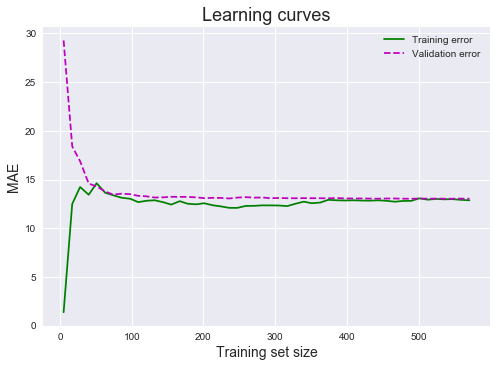

In [60]:
plt.style.use('seaborn')
plt.plot(train_set_size,train_errs_mean,"g-", label = 'Training error')
plt.plot(train_set_size, cv_errs_mean,"--m", label = 'Validation error')
plt.ylabel('MAE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18)
plt.legend()
plt.show()

The Learning curve above shows that :

* The MAE for the training data is less initially and it increases when the the data points increase but when data points increases more than 50 the MAE tend to decrease slightly and becomes stable.

* The MAE for the validation data is more initially but starts decreasing as the train size increase and then becomes stable, with no major changes on increasing the train set size.

The gap between training and validation loss learning curve is a "generalization gap" which seems to be very less,when the train size is more than 50. As the model is shown more training examples, it learns and thus the validation error goes down and becomes stable.It means the model generalizes well.

## Perform the same analysis on dengue_features_test and create submission file

5. Create a submission file which has predictions for both cities in the submission format prescribed by the contest at the link https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/data/. To get this, you need to use the file 'dengue_features_test.csv'

In [61]:
dengue_features_test = pd.read_csv("dengue_features_test.csv")

dengue_features_test.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


In [62]:
dengue_features_test.shape

(416, 24)

In [63]:
dengue_features_test_final = dengue_features_test.drop(["precipitation_amt_mm","reanalysis_sat_precip_amt_mm","reanalysis_dew_point_temp_k"
                                                    ,"reanalysis_specific_humidity_g_per_kg","reanalysis_precip_amt_kg_per_m2","reanalysis_avg_temp_k",
                                                    "station_precip_mm","station_max_temp_c","station_avg_temp_c","station_min_temp_c","year","weekofyear"],axis=1)

In [64]:
dengue_features_test_final.head()

,city,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,reanalysis_air_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_relative_humidity_percent,reanalysis_tdtr_k,station_diur_temp_rng_c
0,sj,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,298.492857,301.1,296.4,78.781429,3.128571,7.057143
1,sj,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,298.475714,300.8,296.7,78.230000,2.571429,5.557143
2,sj,2008-05-13,-0.0015,NaN,0.151083,0.091529,299.455714,302.2,296.4,78.270000,4.428571,7.785714
3,sj,2008-05-20,NaN,-0.019867,0.124329,0.125686,299.690000,303.0,296.9,73.015714,4.342857,6.271429
4,sj,2008-05-27,0.0568,0.039833,0.062267,0.075914,299.780000,302.3,297.3,74.084286,3.542857,7.085714


In [65]:
dengue_features_test_final["reanalysis_relative_humidity_percent"] = dengue_features_test_final["reanalysis_relative_humidity_percent"]/100

In [66]:
dengue_features_test_final['ndvi_ne'] = np.where(dengue_features_test_final["ndvi_ne"] <= 0.25, 0,1) 
dengue_features_test_final['ndvi_nw'] = np.where(dengue_features_test_final["ndvi_ne"] <= 0.25, 0,1) 
dengue_features_test_final['ndvi_se'] = np.where(dengue_features_test_final["ndvi_se"] <= 0.25, 0,1) 
dengue_features_test_final['ndvi_sw'] = np.where(dengue_features_test_final["ndvi_sw"] <= 0.25, 0,1) 

In [67]:
#create new columns by extracting the month from week_start_date
dengue_features_test_final["month"] = pd.to_datetime(dengue_features_test_final["week_start_date"]).dt.month
dengue_features_test_final["Jan_Apr"]= np.where(dengue_features_test_final["month"].isin([1,2,3,4]),1,0)
dengue_features_test_final["May_Aug"]= np.where(dengue_features_test_final["month"].isin([5,6,7,8]),1,0)
dengue_features_test_final["Sep_Dec"]= np.where(dengue_features_test_final["month"].isin([9,10,11,12]),1,0)
dengue_features_test_final = dengue_features_test_final.drop(["month","week_start_date"],axis =1)

In [68]:
#Label-Encoding on city attribute
le = LabelEncoder() 
dengue_features_test_final['city']= le.fit_transform(dengue_features_test_final['city']) 

In [69]:
dengue_features_test_final.city = dengue_features_test_final["city"].astype("category")
dengue_features_test_final.Jan_Apr = dengue_features_test_final["Jan_Apr"].astype("category")
dengue_features_test_final.May_Aug = dengue_features_test_final["May_Aug"].astype("category")
dengue_features_test_final.Sep_Dec = dengue_features_test_final["Sep_Dec"].astype("category")
dengue_features_test_final.ndvi_ne = dengue_features_test_final["ndvi_ne"].astype("category")
dengue_features_test_final.ndvi_nw = dengue_features_test_final["ndvi_nw"].astype("category")
dengue_features_test_final.ndvi_se = dengue_features_test_final["ndvi_se"].astype("category")
dengue_features_test_final.ndvi_sw = dengue_features_test_final["ndvi_sw"].astype("category")

In [70]:
dengue_features_test_final.columns = dengue_features_test_final.columns.str.replace("station","stn")
dengue_features_test_final.columns = dengue_features_test_final.columns.str.replace("reanalysis","re_an")
dengue_features_test_final.columns = dengue_features_test_final.columns.str.replace("humidity","hd")
dengue_features_test_final.columns = dengue_features_test_final.columns.str.replace("precipitation","prec")

In [71]:
dengue_features_test_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 14 columns):
city                         416 non-null category
ndvi_ne                      416 non-null category
ndvi_nw                      416 non-null category
ndvi_se                      416 non-null category
ndvi_sw                      416 non-null category
re_an_air_temp_k             414 non-null float64
re_an_max_air_temp_k         414 non-null float64
re_an_min_air_temp_k         414 non-null float64
re_an_relative_hd_percent    414 non-null float64
re_an_tdtr_k                 414 non-null float64
stn_diur_temp_rng_c          404 non-null float64
Jan_Apr                      416 non-null category
May_Aug                      416 non-null category
Sep_Dec                      416 non-null category
dtypes: category(8), float64(6)
memory usage: 23.6 KB


In [72]:
#create a dataframe for numerical attribute
dengue_num_test = dengue_features_test_final.drop(["city","Jan_Apr","May_Aug","Sep_Dec","ndvi_ne","ndvi_nw","ndvi_se","ndvi_sw"], axis =1)

In [73]:
# Standardize the numerical attributes
sd = StandardScaler()
std_dataset_test = pd.DataFrame(sd.fit_transform(dengue_num_test))

In [74]:
std_dataset_test.columns = dengue_num_test.columns

In [75]:
std_dataset_test.isnull().sum()

re_an_air_temp_k              2
re_an_max_air_temp_k          2
re_an_min_air_temp_k          2
re_an_relative_hd_percent     2
re_an_tdtr_k                  2
stn_diur_temp_rng_c          12
dtype: int64

In [76]:
std_dataset_test = std_dataset_test.fillna(std_dataset_test.mean())

In [77]:
# extract categorical and target columns
cat_dataset_test= dengue_features_test_final[['city','Jan_Apr','May_Aug','Sep_Dec','ndvi_sw','ndvi_se','ndvi_nw','ndvi_ne']]

In [78]:
cat_dataset_test.index = std_dataset_test.index

In [79]:
#concat the numerical, categorical and target attributes after transformations
final_df_test = pd.concat([std_dataset_test,cat_dataset_test],axis=1)

final_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 14 columns):
re_an_air_temp_k             416 non-null float64
re_an_max_air_temp_k         416 non-null float64
re_an_min_air_temp_k         416 non-null float64
re_an_relative_hd_percent    416 non-null float64
re_an_tdtr_k                 416 non-null float64
stn_diur_temp_rng_c          416 non-null float64
city                         416 non-null category
Jan_Apr                      416 non-null category
May_Aug                      416 non-null category
Sep_Dec                      416 non-null category
ndvi_sw                      416 non-null category
ndvi_se                      416 non-null category
ndvi_nw                      416 non-null category
ndvi_ne                      416 non-null category
dtypes: category(8), float64(6)
memory usage: 23.6 KB


In [80]:
svr_linearreg_test = SVR(kernel="linear",C= 95.2,gamma='auto', epsilon= 1.5,tol=0.2)
svr_linearreg_test.fit(train,train_target)
dengue_predictions_svr_test =  svr_linearreg_test.predict(final_df_test)

In [81]:
#Create a  DataFrame with the city,months divided,and total cases
submission = pd.DataFrame({'city':dengue_features_test['city'],'year': dengue_features_test['year'],'weekofyear':dengue_features_test['weekofyear'],
                           'total_cases':dengue_predictions_svr_test})
#Visualize the first 5 rows
submission.head()


,city,year,weekofyear,total_cases
0,sj,2008,18,17.668267
1,sj,2008,19,14.978916
2,sj,2008,20,16.972283
3,sj,2008,21,14.123514
4,sj,2008,22,14.761418


In [82]:
#Convert DataFrame to a csv file that can be uploaded
#This is saved in the same directory as notebook
filename = 'Dengue_Prediction_Submission_final2.csv'
submission.to_csv(filename,index=False)
print('Saved file: ' + filename)

Saved file: Dengue_Prediction_Submission_final2.csv


6. Optional: Submit your predictions to the contest. You will get a submission score. Use any other models of your choice discusssed in the class and check if you get improved result. Show it here.

Submitted :- Score in competition are below 

SGD - 27.60

Score for SVR with Linear kernel - 28.30

7.Compare the Model Evaluation metric of SGD (Assignment 2), Linear SVR and SVR with Linear Kernel and state which model performed better along with reason why you consider so.

The best MAE received from 3 models are below on test:-

SGD - 15.85

Linear SVR - 14.799

SVR with Linear Kernel - 14.785

The best MAE is achieved in SVR with Linear kernel though not much big difference in MAE from other two models for the test data while SGD score looks good better in competition. As we can see from the learning curves for all the 3 models, the curve for SVR with linear curve becomes stable for taining and validation set.Adding more training instances within the margin does not affect the model's predictions much and it can be seen that the gap between the learning curves of validation and training set which is less. Hence we can say that this model generalize much better than other two. Again, there is scope for improvement and other modeling techniques can be used to see the results.